### Exercise 2 (6 Points):

##### Write your own function (without using sklearn) that plots a roc curve given: (i) the predictions of the respective model on the test data  and (ii) the true label of the test data. Use this function to generate the ROC plots for two models like in Exercise 1.

##### (Hint: You do not need to calculate the area-under-curve).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transactions = pd.read_csv('data/data.csv')

transactions.drop(['Unnamed: 0'], axis=1, inplace=True)

transactions = transactions[['totalAmount','c_0','c_1','c_2','c_3','c_4','c_5', 'returnLabel']]
transactions.head()

,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5,returnLabel
0,240,1,0,3,1,3,0,0
1,79,0,0,1,0,0,0,0
2,24,0,0,1,1,0,0,0
3,504,0,3,0,0,1,2,0
4,190,1,0,1,1,2,0,0


In [3]:
from sklearn.model_selection import train_test_split

X = transactions.drop('returnLabel',axis=1)
y = transactions.returnLabel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(solver='liblinear')
reg_model.fit(X_train, y_train)

reg_probs = reg_model.predict_proba(X_test)[:, 1]
reg_probs_df = pd.DataFrame(reg_probs)

In [5]:
from sklearn.ensemble import RandomForestClassifier

for_model = RandomForestClassifier(n_estimators=500)
for_model.fit(X_train, y_train)

for_probs = for_model.predict_proba(X_test)[:, 1]
for_probs_df = pd.DataFrame(for_probs)

In [6]:
def prepare_df(probs):
  df = pd.DataFrame(y_test)
  df.reset_index(drop=True, inplace=True)

  probs_df = pd.DataFrame(probs)
  probs_df.rename(columns={0: "probs"}, inplace=True)

  new_probs_df = pd.concat([df['returnLabel'], probs_df['probs']], axis=1, keys=['returnLabel', 'probs'])

  new_probs_df.sort_values(by='probs', ascending=False, inplace=True)
  new_probs_df.reset_index(drop=True, inplace=True)
  return new_probs_df

new_reg_probs_df = prepare_df(reg_probs)
new_for_probs_df = prepare_df(for_probs)

In [7]:
def get_tpr_fpr(sorted_df):
  tpr = []
  fpr = []
  my_range = len(sorted_df)
  for i in range(my_range):
    tp = fp = all_pos = all_neg = 0
    threshold = sorted_df.probs[i]
    for j in range(my_range):
      if sorted_df.returnLabel[j]:
        all_pos += 1
        if sorted_df.probs[j] >= threshold:
          tp += 1
      else:
        all_neg += 1
        if sorted_df.probs[j] >= threshold:
          fp += 1
    if all_pos and all_neg:
      # TPR = True positives / all positives
      my_tpr = tp / (all_pos)
      # FPR  = False positives / all negatives
      my_fpr = fp / (all_neg)
      tpr.append(my_tpr)
      fpr.append(my_fpr)
  return(tpr, fpr)

reg_tpr, reg_fpr = get_tpr_fpr(new_reg_probs_df)
for_tpr, for_fpr = get_tpr_fpr(new_for_probs_df)

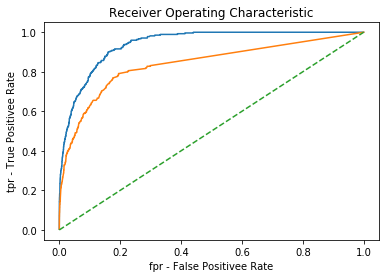

In [8]:
# plot the roc curve for the model
plt.plot(reg_fpr, reg_tpr, for_fpr, for_tpr)
#plt.plot(reg_fpr, reg_tpr)

plt.plot([0, 1], [0, 1], linestyle='--')


#plt.legend(['Logistic Regression', 'Random Forest'], loc='best')

# naming the axes 
plt.xlabel('fpr - False Positivee Rate') 
plt.ylabel('tpr - True Positivee Rate')  
  
plt.title('Receiver Operating Characteristic') 

# show the plot
plt.show()